#### Coffee Sales Dataset

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = (3, 2)

df = pd.read_csv("coffee_sales.csv", header=3)
df.dropna(axis=1, how="all", inplace=True)
df.dropna(axis=0, how="all", inplace=True)

obj = str.maketrans("", "", "$,")
df["Sales"] = df["Sales"].str.translate(obj).astype(float)
df["Target Sales"] = df["Target Sales"].str.translate(obj).astype(float)
df["Profit"] = df["Profit"].str.translate(obj).astype(float)
df["Target Profit"] = df["Target Profit"].str.translate(obj).astype(float)

df["Target Status"] = np.where(df.Sales >= df["Target Sales"], "Achieved", "Not Achieved")
status = np.where(df.Profit >= df["Target Profit"], "Achieved", "Not Achieved")
df.insert(7, "Target Profit Status", status)

df["Date"] = pd.to_datetime(df["Date"], format="mixed")

df.head()

### Operations on DataFrame

- Adding new column by calculation
- Sorting and Ranking
- map(), replace(), apply()

###### Ex. Add column Target Status

In [ ]:
df["Target Status"] = np.where(df.Sales >= df["Target Sales"], "Achieved", "Not Achieved")
df.head(3)

###### Ex. Insert column at specific position

In [ ]:
status = np.where(df.Profit >= df["Target Profit"], "Achieved", "Not Achieved")
df.insert(7, "Target Profit Status", status)
df.head()

###### Ex. Count the number of times the target was achieved versus the number of times it was not achieved.
- df.value_counts()
- df.plot(kind = "bar")
- sns.countplot()

In [ ]:
df.shape[0]

In [ ]:
df["Target Status"].value_counts() # Series object

In [ ]:
(df["Target Status"].value_counts(normalize=True) * 100).round(2)

###### Ex. Plot the target status on a bar chart

In [ ]:
df["Target Status"].value_counts().plot(kind = "bar")

In [ ]:
(df["Target Status"].value_counts(normalize=True) * 100).round(2).plot(kind = "bar")

###### Ex. Plot the profit target status using sns

In [ ]:
import seaborn as sns

In [ ]:
_ = sns.countplot(df, x = "Target Profit Status")

In [ ]:
colors = dict(zip(df["Target Profit Status"].unique(), ["lightcoral","limegreen"]))
colors

In [ ]:
_ = sns.countplot(data = df, x = "City", hue = "Target Profit Status", 
                 palette=colors) # palette takes dict object {status : color}
plt.legend()

###### Ex. Using bar chart display total sales across products
- df.groupby()
- sns.barplot()

In [ ]:
df.groupby("Product")["Sales"].sum()

In [ ]:
# using pandas - groupby is mandatory
_ = df.groupby("Product")["Sales"].sum().plot(kind = "bar", figsize = (10, 2), color = "teal")
_ = plt.xticks(rotation = 30)

In [ ]:
# using seaborn
plt.figure(figsize=(10, 2))
sns.barplot(data=df, x = "Product", y="Sales", color = "teal", estimator=np.sum, errorbar=None)
_ = plt.xticks(rotation = 30)

###### Ex. Display Product wise total Sales and Average Profit

In [ ]:
df.groupby("Product")[["Sales", "Profit"]].sum() # Sales and Profit both agg to sum

In [ ]:
df.groupby("Product").agg({"Sales" : "sum", "Profit" : "mean"})

In [ ]:
df.groupby("Product").agg({"Sales" : "sum", "Profit" : "mean"})

In [ ]:
# Using Secondary axis
data = df.groupby("Product").agg({"Sales" : "sum", "Profit" : "mean"})
_ = data.plot(kind = "bar", secondary_y = "Profit", figsize = (7, 2))

In [ ]:
# Using Sub-plots
data = df.groupby("Product").agg({"Sales" : "sum", "Profit" : "mean"})
_ = data.plot(kind = "bar", subplots = True, figsize = (7, 4))

#### Working of Datetime format

###### Ex. Convert Date column to datetime

In [ ]:
df["Date"] = pd.to_datetime(df["Date"], format="mixed")
df.head(3)

###### Ex. Extract data for Year 2021

In [ ]:
df[df["Date"].between("2021-01", "2021-12")]

###### Ex. Extract data between Jan-2021 to Mar-2021

In [ ]:
df[df["Date"].between("2021-01", "2021-03")]

###### Ex. Extract data for Jan-2021, Mar-2021, Jan-2022

In [ ]:
df[df["Date"].isin(("2021-01", "2021-03", "2022-01"))]

###### Extract Year and Month from date field

In [ ]:
df.insert(1, "Year", df.Date.dt.year)
df.insert(2, "Month", df.Date.dt.month_name())
df.head(2)

###### Ex. Extract Data for year 2021

In [ ]:
df[df.Year == 2021]

###### Ex. Extract Data for Jan-2021

In [ ]:
df[np.logical_and(df.Year == 2021, df.Month == "January")]


###### Ex. Display Trend over the period of time

In [ ]:
# using pandas
_ = df.groupby("Date")["Sales"].sum().plot(kind = "line", marker = "o", figsize = (12, 2))

In [ ]:
# seaborn
plt.figure(figsize = (12, 2))
_ = sns.lineplot(data=df, y = "Sales", x="Date", estimator="sum", errorbar=None, marker = "o", 
                color = "teal")

###### Ex. Display Sales over years

In [ ]:
# using pandas
_ = df.groupby("Year")["Sales"].sum().plot(kind = "line", marker = "o", figsize = (12, 2))

In [ ]:
# seaborn
plt.figure(figsize = (12, 2))
_ = sns.lineplot(data=df, y = "Sales", x="Year", errorbar=None, marker = "o", 
                color = "teal")

###### Ex. Display Sales over months

In [ ]:
# Using month number to group the data and sort the dataframe as per month number
data = df.groupby(["Month", df["Date"].dt.month])["Sales"].sum().to_frame()
data.head()

In [ ]:
data.sort_values(by = "Date", inplace=True)
_ = data.plot(kind = "line", marker = "o", figsize = (12, 2))
_ = plt.xticks(range(0, 12), df.Month.unique())

In [ ]:
# using pandas - set sort= False to sort the Month as per data source Order
_ = df.groupby("Month", sort=False)["Sales"].sum().plot(kind = "line", marker = "o", figsize = (12, 2))
_ = plt.xticks(range(0, 12), df.Month.unique())

In [ ]:
# seaborn
plt.figure(figsize = (12, 2))
_ = sns.lineplot(data=df, y = "Sales", x="Month", errorbar=None, marker = "o", 
                color = "teal")

###### Ex. Display number of franchises where each product sold across cities

In [ ]:
pd.pivot_table(data = df, index="Product", columns="City", values="Sales")

In [ ]:
pd.pivot_table(data = df, index="Product", columns="City", values="Sales", aggfunc="sum")

In [ ]:
pd.pivot_table(data = df, index="Product", columns="City", values="Franchise",
              aggfunc= "nunique").fillna(0).astype(int)

<hr><hr>

## Explolatory Data Analysis

### Types of data 

#### Numerical (Quantitative) Data:

Numerical data consists of numbers and is measured on a continuous or discrete scale.
- Continuous numerical data can take any value within a range (e.g., height, temperature).
- Discrete numerical data can take only specific, distinct values (e.g., number of siblings, number of cars).

#### Categorical (Qualitative) Data:

Categorical data represents categories or labels and is not inherently numerical.
- Nominal categorical data has categories with no inherent order or ranking (e.g., gender, eye color).
- Ordinal categorical data has categories with a specific order or ranking (e.g., education level, socioeconomic status).

### Population and Sample

#### Population:

The population is the entire group or set of individuals, items, or elements that you are interested in studying and drawing conclusions about. It represents the complete set of possible observations that share a common characteristic or attribute.
For example, if you are studying the heights of all adult males in a country, the population would consist of the heights of all adult males in that country.

#### Sample:

A sample is a subset or a smaller representative group selected from the population.
It is used to make inferences or draw conclusions about the population without having to collect data from every individual in the population.

The process of selecting a sample from the population is known as sampling.
For example, instead of measuring the heights of all adult males in a country (which may be impractical or too costly), you might select a random sample of adult males and measure their heights to estimate the average height of the entire population.

#### Key points to note about population and sample:

- The population represents the entire group under study, while the sample represents a subset of that group.
- In many cases, it is not feasible or practical to collect data from the entire population, so researchers use samples to make inferences about the population.
- The goal of sampling is to obtain a representative sample that accurately reflects the characteristics of the population.
Statistical techniques are used to analyze sample data and make generalizations or predictions about th##e population.

#### Characteristics of Population

- Mean (Average): The mean of a population is the average value of a quantitative variable across all individuals in the population. It represents the central tendency of the population distribution.

- Median: The median of a population is the middle value of a quantitative variable when all observations are arranged in ascending order. It is another measure of central tendency that is less affected by extreme values (outliers) compared to the mean.

- Mode: The mode of a population is the most frequently occurring value or category of a variable. It represents the value with the highest frequency in the population distribution.

- Variance: The variance of a population measures the spread or dispersion of values around the mean. It quantifies the average squared deviation of individual observations from the mean.

- Standard Deviation: The standard deviation of a population is the square root of the variance. It provides a measure of the average distance between individual observations and the mean.

- Range: The range of a population is the difference between the maximum and minimum values of a variable. It provides a simple measure of the spread of values in the population.

- Distribution: The distribution of a population describes how the values of a variable are spread or distributed across the population. Common types of distributions include normal (bell-shaped), skewed (asymmetric), and ##uniform (evenly distributed).

#### Characteristics of a Sample

- Sample Size: The sample size is the number of observations or individuals included in the sample. It represents the amount of data available for analysis and inference.
- Sampling Method: The sampling method describes how the sample was selected from the population. Common sampling methods include simple random sampling, stratified sampling, cluster sampling, and systematic sampling.

- Descriptive Statistics: Descriptive statistics summarize the main features of the sample data. Common descriptive statistics include measures of central tendency (mean, median, mode), measures of dispersion (range, variance, standard deviation), and measures of shape (skewness, kurtosis).

- Sample Proportion: The sample proportion represents the fraction or percentage of observations with a specific attribute or characteristic in the sample. It provides insights into the relative frequency of different categories in the sample.

- Confidence Interval: The confidence interval is a range of values that is likely to contain the true population parameter with a certain level of confidence. It is used to estimate the precision or uncertainty of sample statistics, such as the sample mean or proportion.

- Sampling Bias: Sampling bias refers to the systematic distortion or deviation of the sample from the population due to the sampling method used. It can affect the representativeness and generalizability of the sample data to the population. the sample data to the population. distributed).

## Types of Variables 

- **`Features`**: Features, also known as independent variables or input variables, are the attributes or characteristics of the data that are used as input to the machine learning model to make predictions. Features represent the variables that the model learns from to make predictions or classifications. Each feature can be either numerical or categorical and may have different scales or levels of measurement.

- **`Labels`**: Labels, also known as target variables or dependent variables, are the outputs or predictions that the machine learning model aims to predict based on the input features. Labels represent the target variable that the model is trying to learn or predict. In supervised learning tasks, the labels are typically known for a subset of the data, and the goal is to train the model to accurately predict the labels for unseen data.

## Descriptive Statistics

Descriptive statistics deals with summarizing and describing the features of a dataset or sample. Descriptive statistics provides a summary of the main features of the data, including measures of central tendency, dispersion, shape, and relationships between variables.

#### Measures of Central Tendency:
    - Mean: The average value of the data points.
    - Median: The middle value of the data when arranged in ascending order.
    - Mode: The most frequently occurring value in the dataset.

#### Measures of Dispersion:
    - Range: The difference between the maximum and minimum values in the dataset.
    - Variance: The average of the squared differences from the mean.
    - Standard Deviation: The square root of the variance, representing the average deviation from the mean.

#### Measures of Shape:
    - Skewness: A measure of the asymmetry of the distribution.
        - Positive skewness indicates a longer right tail and a concentration of data on the left side.
        - Negative skewness indicates a longer left tail and a concentration of data on the right side.
        - Skewness close to zero indicates approximate symmetry around the mean.

    - Kurtosis: A measure of the "peakedness" or "flatness" of the distribution.
        - Positive kurtosis indicates heavy tails and a sharp peak (leptokurtic).
        - Negative kurtosis indicates light tails and a flat peak (platykurtic).
        - A kurtosis of 0 indicates a distribution with similar tails to the normal distribution (mesokurtic).

#### Frequency Distribution:
    - Frequency table: A table that shows the frequency or count of each value in the dataset.
    - Histogram: A graphical representation of the frequency distribution, showing the distribution of values in bins or intervals.

#### Measures of Association:
    - Correlation: A measure of the strength and direction of the linear relationship between two variables.
    - Covariance: A measure of the joint variability between two variables.

###### Ex. Find Mean, Median, Mode, Range, Standard Deviation, Skewness, Kurtosis, Frequency Distribution - Histogram

Example 1

In [ ]:
from scipy.stats import stats

In [ ]:
# dataset consists of weights children in the age group of 0 to 10 years
weights = np.array([20.8,15.3,23.2,15.5,17.5,27.3,23.3,20.5,16.4,17.4,22.6,20.8,16.7,29.1,14.2,18.5,17.6,17.1,18.2,26.0,25.6,19.1,17.8,21.6,19.6,28.4,19.4,22.8,25.9,27.1,20.8,21.9,15.4,30.2,23.0,25.0,24.0,17.1,18.8,25.8,23.2,14.9,20.4,15.0,12.3,17.6,10.3,12.1,25.8,21.9,9.9,24.8,17.9,22.0,27.6,21.7,26.3,19.9,16.6,17.8,8.0,21.5,17.9,33.6,20.4,21.9,19.8,15.3,25.6,24.7,10.6,22.1,18.8,9.8,14.9,18.7,27.6,21.2,25.1,21.9,22.1,19.6,10.4,17.2,18.3,21.2,21.1,21.0,19.1,14.8,19.2,18.3,22.1,14.1,19.3,16.2,25.6,14.8,22.3,25.0,20.8,21.2,16.6,15.0,15.6,24.7,26.1,18.1,14.1,25.5,21.4,32.7,13.8,27.4,15.8,18.4,21.3,27.5,15.8,27.2,26.9,16.2,22.6,15.3,22.5,26.6,24.7,28.4,28.0,19.9,9.9,16.5,19.5,11.7,27.9,28.1,21.1,20.0,14.5,25.9,13.3,15.8,21.3,10.7,14.6,19.9,21.6,26.6,26.0,23.7,20.5,11.8,15.6,14.9,24.6,20.9,24.5,26.8,25.3,30.9,26.1,14.9,17.9,18.5,25.7,16.4,8.2,24.1,19.5,13.1,17.6,13.4,24.4,16.4,19.9,12.9,14.3,25.4,15.4,17.7,17.3,18.7,16.1,7.4,18.4,16.2,18.7,19.8,25.6,23.7,22.5,20.5,14.9,25.0,4.7,6.8,21.8,22.2,24.4,13.4,32.1,26.6,27.2,17.8,19.6,16.8,14.4,24.9,12.6,15.0,15.4,10.1,12.9,15.9,22.3,15.0,24.4,21.0,17.2,25.2,15.6,24.6,24.9,13.6,10.3,25.6,18.3,25.1,18.1,20.2,29.1,25.7,14.9,11.4,19.2,21.5,13.9,19.5,19.1,23.0,26.8,14.8,24.4,14.7,24.3,24.5,19.9,12.1,21.2,16.4,19.5,25.8,8.5,19.8,23.4,21.3,14.7,17.9,15.7,14.9,5.2,3.8,31.5,17.4,16.0,20.7,18.4,8.1,22.9,32.8,19.0,33.0,26.0,14.2,18.4,15.1,29.5,13.9,5.1,28.1,18.2,10.5,27.8,19.4,13.1,21.9,18.6,11.0,19.7,20.2,20.1,17.6,21.6,21.2,30.0,26.1,20.5,22.8,20.5,19.6,18.0,19.8,21.8,7.0,21.4,22.5,18.9,15.1,22.0,25.5,11.1,15.4,21.5,13.5,11.2,19.3,25.5,20.2,18.3,15.3,40.3,22.1,23.2,17.1,19.4,15.3,28.6,23.0,19.4,16.7,20.9,21.1,15.9,29.6,17.0,19.0,20.8,20.4,9.8,24.0,15.2,26.2,22.0,21.4,16.2,29.2,21.4,28.9,16.9,21.9,11.2,19.0,21.2,20.8,9.3,12.5,26.9,10.7,18.9,17.5,23.3,12.5,13.4,26.3,23.0,21.8,25.6,20.7,18.0,32.5,25.6,8.4,19.8,24.5,18.0,24.7,21.3,12.9,21.6,29.1,25.8,26.4,27.0,25.6,19.0,20.0,10.4,17.5,19.5,17.5,21.1,19.6,23.1,18.2,27.0,18.5,19.3,25.4,20.8,20.8,20.6,20.4,23.1,17.6,18.7,16.2,18.9,15.2,22.5,10.0,21.1,29.3,17.8,27.1,16.8,18.0,28.3,16.5,19.8,16.7,23.2,23.6,18.5,29.8,24.2,22.4,29.3,29.3,21.5,15.5,23.0,12.8,20.8,11.5,20.0,15.2,18.7,17.2,22.5,13.5,13.1,17.6,12.1,23.2,18.0,24.2,7.3,17.0,17.0,22.7,22.1,18.0,15.6,13.9,17.7,14.7,26.1,12.2,20.3,17.8,16.5,10.2,18.2,22.2,26.3,26.6,19.2,19.5,14.3,15.6,13.9,20.2,11.6,31.2,6.3,23.4,21.1,22.0,8.5,11.5,19.3,17.7,11.9,14.8,16.9,16.1,13.0,17.9,22.0,14.2,13.9,25.4,21.1,16.3,16.4,19.3,18.3,23.0,27.4,24.2,14.9,12.7,16.7,17.8,19.5,14.9,23.9,15.2,25.4,22.9,25.2,12.7,26.0,26.7,15.8,24.9,24.4,15.5,20.0,7.8,20.6,19.0,29.8,14.1,14.1,17.8,24.9,20.7,19.8,24.2,16.7,21.3,23.7,20.9,23.6,25.3,9.9,21.7,16.7,10.3,18.9,25.2,12.7,27.4,21.4,23.0,11.8,22.1,13.0,20.0,27.2,19.8,16.9,18.8,25.0,9.0,19.0,11.1,19.6,24.0,29.3,20.7,10.7,26.9,18.6,21.5,26.2,21.5,27.9,22.1,25.1,27.9,18.9,26.4,20.0,25.6,27.5,17.7,18.9,27.0,14.9,27.6,19.6,18.1,19.2,20.2,16.4,16.6,14.1,8.9,17.6,17.3,21.0,14.3,18.7,19.9,12.3,24.4,23.3,25.1,27.9,15.1,18.3,23.2,17.8,15.5,22.0,23.0,20.4,15.5,22.8,19.5,22.2,22.3,25.1,15.0,19.9,23.8,18.8,17.0,7.9,24.0,31.4,17.6,27.4,28.1,17.9,18.3,17.3,21.6,17.8,22.4,19.2,22.8,21.4,19.1,22.4,29.4,13.6,15.0,28.8,18.2,25.8,15.1,23.6,12.2,10.1,15.4,27.0,17.2,11.6,20.8,18.8,20.4,18.1,20.9,31.1,19.0,18.5,17.9,23.1,32.0,21.7,23.4,17.1,19.0,18.1,19.3,18.8,25.8,19.8,22.1,15.8,15.9,21.3,18.4,17.8,23.1,22.2,15.3,20.0,20.8,30.2,24.0,12.6,9.2,21.7,19.8,16.6,16.5,18.0,21.1,10.0,23.5,26.9,23.7,16.8,12.7,29.8,17.9,18.6,19.9,23.6,26.4,18.2,18.1,19.2,15.3,19.4,20.2,33.2,26.2,26.9,15.3,18.9,18.3,27.6,29.0,22.5,30.2,22.8,13.8,21.4,27.3,25.1,26.7,7.9,27.3,21.9,15.6,18.1,19.9,23.0,22.9,15.0,16.5,18.9,24.8,4.9,16.7,20.2,7.9,19.3,16.1,22.5,27.4,29.6,18.7,21.9,9.9,24.6,10.1,21.5,20.6,11.4,14.0,18.4,6.5,12.8,25.5,19.5,14.6,20.5,18.9,14.8,21.7,17.3,33.1,23.1,25.1,30.2,17.0,13.2,29.2,14.8,13.5,22.3,9.0,19.2,19.1,20.4,14.2,20.6,19.3,27.6,21.4,15.5,23.4,13.2,12.1,23.2,33.8,17.5,19.1,23.2,12.6,24.6,14.6,19.5,20.1,13.4,12.4,14.6,16.8,27.5,19.5,11.5,15.4,24.0,21.1,21.8,29.1,18.9,21.3,18.9,20.1,13.7,19.7,17.0,34.0,24.0,16.9,19.3,19.9,19.4,19.3,21.5,20.8,20.1,27.1,23.5,22.9,19.4,14.8,28.6,23.2,8.7,30.1,19.1,15.1,22.3,17.4,23.8,18.1,20.4,23.1,22.4,13.7,25.5,25.9,21.3,21.6,21.4,29.7,18.1,10.3,23.6,21.0,13.1,10.6,20.8,21.7,19.4,21.4,25.1,16.6,11.1,13.8,21.1,22.0,20.8,19.1,24.4,15.2,25.1,19.2,10.5,21.8,17.5,19.6,8.2,22.1,21.8,13.6,15.1,28.4,22.0,28.6,25.3,29.3,19.1,20.8,10.8,23.6,13.5,23.2,16.9,22.9,21.3,21.8,31.3,21.1,17.1,25.5,26.1,19.2,19.9,26.4,34.9,17.4,24.2,17.5,21.7,11.3,4.9,21.3,17.2,15.6,22.4,28.2,22.3,21.3,20.5,18.4,17.5,9.7,21.4,12.8,20.0,20.7,16.1,26.2,20.9,19.2,23.6,22.4,31.7,22.5,20.3,13.8,23.3,17.4,3.0,16.6,17.1,27.8,17.4,13.7,14.1,26.4,23.9,21.2,27.4,9.9,18.7,17.0,21.1,22.9,8.7,19.1,25.1,21.0,22.3,21.5,19.6,17.6,22.7,14.7,11.5,28.6,19.9,13.5,27.3,19.6,18.7,14.0,11.6,15.0,26.5,21.7,22.1,5.7,18.3,23.4,19.5,15.8,18.6,19.3,27.0,21.7,21.9,20.7,13.5,29.7,22.3,24.0,31.1,23.9,15.7,19.6])
weights.mean(), np.median(weights), stats.mode(weights).mode, np.std(weights), np.var(weights)

In [ ]:
sns.histplot(weights, kde = True)

###### Example 2 -

In [ ]:
# dataset consists of Salaries of employees in an organisation
salaries = np.array([29756,20014,20347,57214,41327,40209,93390,122004,17725,47210,44386,48407,16837,83731,9130,66723,72525,57347,10941,18726,8913,59251,13090,37983,134656,45499,59533,82998,31440,11672,16295,30676,21822,35263,27340,65522,23380,11662,7066,22403,41230,46693,22478,82491,7347,16263,72672,20522,38409,30175,31383,98820,13605,45096,12397,90988,6602,29786,102559,31790,29768,50085,22649,24426,4059,95210,68657,17799,37370,46160,35133,40969,57201,54757,17973,13610,46004,91341,24474,48005,9473,10277,71287,9383,36492,104352,13473,51293,51911,10026,39992,125885,44462,76531,41512,47267,33231,14180,44474,55702,39554,8359,51892,98574,43638,90568,40508,34129,98497,74784,63383,47197,83519,26458,38642,9629,18404,47324,15793,120345,61126,64613,57964,47582,77944,27082,51891,98126,69008,23284,49785,72406,56418,36769,58715,42999,47333,45733,141091,3848,57584,48356,95301,95269,49894,101380,44028,54577,71055,32066,26596,66653,3179,44484,62889,62952,50903,74656,50733,38180,59410,105003,73854,33579,150293,26348,6769,26315,53038,35766,50517,64714,27523,26867,46607,9882,60052,46653,42143,37371,14475,103629,55402,6149,65128,32861,27603,75553,35641,21457,106916,50369,37731,6473,73858,7716,21144,34340,27917,18150,49270,16344,84532,28616,18452,84678,17990,26463,13671,70005,26237,7245,16941,64383,3317,7275,26981,12600,36983,40054,7283,82140,65120,8259,44235,30682,68578,80737,14009,88942,48374,43148,11447,32203,67168,50149,8607,9680,35442,47306,67316,52503,89884,18337,11798,40659,90852,25479,4737,107231,40006,34020,61695,12128,14126,71024,42150,54591,93625,23809,9698,50910,75967,36494,53497,28006,16650,50352,42133,10915,50698,19962,30772,23430,75790,72083,162101,75728,60565,40074,58299,18280,128972,76801,38314,12744,25607,22188,31862,15955,31175,11044,44390,49677,33251,85617,81684,48054,63108,33461,39505,51449,47547,49199,152777,49820,23147,35010,44921,39633,16546,35436,32229,28603,31804,21668,102866,58514,140647,22149,26732,88552,77813,75665,38038,123394,9457,28241,52657,9075,148287,70362,27398,18672,19003,17600,114609,4318,19729,23148,32015,87090,5342,56550,38458,5400,50686,46353,14777,19302,16606,21645,37117,22488,5465,28650,57321,34736,43956,37151,9776,37461,17631,98557,18773,15927,62892,35395,23658,27429,22496,60550,36644,38050,79320,7934,30101,71573,14389,4701,31291,11384,39725,123530,44408,58972,95799,10389,46232,3432,40560,35984,4665,169950,111402,18065,21540,70358,51973,26344,101435,5668,28783,6701,64979,30591,53626,89555,54550,47720,72312,32532,81224,32367,12856,45452,23288,68436,11028,48698,59988,25334,12898,76129,76496,66076,28330,66192,34221,24405,81851,52335,38502,25430,29421,7258,23734,12534,60625,23697,17543,35830,5033,17253,27189,48127,91649,58796,46586,42569,40202,70022,3922,41658,66536,67928,13621,71191,63947,89954,7543,20366,73226,55216,63823,20147,28646,62441,10910,21883,40687,5770,12349,59303,82027,45440,12710,126532,87569,69111,27004,13098,37670,125784,37616,46404,36971,20823,44255,53184,53752,9362,16464,13631,24283,57198,27205,60289,35590,21193,59034,71649,40198,22347,37446,30613,39731,23986,65414,6705,23140,42971,9792,23886,16397,17598,42024,32014,78351,31432,3978,34883,19845,10204,56595,25611,58573,31771,60213,24678,85938,22206,27750,43462,24977,22131,65617,70257,71995,75183,106608,54436,44381,61439,41163,81099,34095,36953,14703,23992,105384,20334,34145,48786,72804,71943,32757,77178,6381,77041,85234,31634,62231,7004,66194,23721,18122,82066,43339,13417,28110,26647,11703,160005,55765,78251,35519,22708,66840,6126,37952,31632,55294,13842,57847,43009,57445,41641,13437,41892,8126,55609,71439,65768,3032,12225,16758,12150,110890,58822,80581,12690,69074,49169,118185,9745,24482,35611,21100,13245,25269,26177,60738,119320,13615,120677,36560,14048,16249,73591,11789,42419,8691,44373,5698,38758,39244,36214,7654,26381,42371,42425,5167,38173,28250,11362,41671,38101,22759,29654,16846,42528,32035,51949,34841,65641,94153,55081,42157,53629,5482,6064,33333,53055,38653,54655,25486,28830,18681,38431,89032,38939,44533,44382,7073,93080,39698,68653,14900,4180,26923,27360,30629,33018,23166,4915,50098,31775,14625,48831,53413,50677,16354,24128,49869,23038,53312,43846,11263,19507,11322,86895,60729,144564,33429,36964,4437,48013,39779,71605,45697,20501,3059,39338,3228,22719,37974,72431,8486,24363,19558,64046,35799,20259,79873,13544,36404,55886,13904,42955,43750,17743,107390,86058,40137,65042,29084,8999,6357,29914,45867,75705,19543,64725,60567,58452,5015,50256,60877,91907,42209,13678,7797,23545,65227,86909,18614,12483,34314,52497,28754,112096,30756,16519,18075,9958,14076,16114,5200,40241,14275,53117,50561,27253,3998,85851,32716,44901,40698,42272,67106,73621,23828,50619,64147,89432,67240,119266,15347,50315,39374,27347,21786,7037,33320,9277,14225,25474,50546,61235,64796,38341,46464,38388,53785,8315,29782,35079,5943,9616,73662,52409,28236,40773,84419,49739,8678,46548,16583,15864,5920,42891,6635,91882,54534,32013,105413,11681,18153,98213,60754,53642,40221,43931,60076,9481,17046,26098,22609,21386,2797,11266,59378,57464,46271,10182,53724,89160,33549,19557,8022,43213,62795,42025,74820,49326,55701,65268,49257,38526,47121,32407,100592,21980,10691,10664,13298,58489,81011,24481,30354,5334,11554,62781,80241,17457,13682,12911,32340,54094,4987,15562,19126,58105,62497,34333,74015,78119,27715,20098,37580,14200,24208,36266,68885,66174,3965,143792,35892,43824,14009,7294,69932,11540,31644,55554,6756,69754,65940,26128,88712,11048,14382,34369,3908,30339,9290,22745,49669,93604,62655,50036,60244,52406,44821,37915,4894,38413,44612,19168,26668,20326,45231,12448,35082,121782,4863,7291,24332,42551,28462,67887,21226,41026,137990,53668,40922,15485,21118,118903,77715,24519,58873,61054,25674,2960,30624,103189,48284,40536,56053,37084,50773,11615,83270,4311,30367,6372,56358,14518,10602,35857,93798,51500,69148,51610,27676,16157,92788,4395,23687,11944,57418,71058,37037,23290,34201,84364,68400,24135,18615,15050,113480,83720,52761,26031,43187,11278,3710,27465,97386,3393,65371,5707,106125,46278,12099,17823,39132,34422])
_ = sns.histplot(salaries, kde = True)

Example 3 -

In [ ]:
# dataset consists of life-expectancy data 
life_expectancy = np.array([52, 61, 58, 75, 74, 77, 58, 74, 54, 65, 67, 75, 74, 70, 36, 65, 35,55, 64, 28, 46, 52, 75, 42, 64, 75, 44, 65, 58, 65, 45, 73, 79, 48,55, 65, 53, 66, 56, 40, 76, 52, 77, 63, 74, 53, 22, 43, 33, 75, 60,58, 44, 69, 73, 36, 74, 72, 65, 56, 67, 68, 56, 67, 62, 59, 68, 53,59, 61, 59, 77, 76, 70, 78, 74, 64, 15, 42, 65, 70, 65, 64, 67, 65,66, 25, 65, 63, 75, 78, 63, 81, 80, 82, 66, 42, 26, 64, 72, 59, 78,69, 73, 79, 65, 60, 39, 64, 44, 77, 74, 42, 13, 73, 64, 65, 75, 78,72, 49, 75, 65, 59, 40, 70, 31, 58, 61, 79, 56, 67, 79, 61, 48, 68,52, 79, 70, 70, 59, 53, 75, 63, 31, 25, 63, 79, 60, 77, 77, 64, 33,52, 64, 40, 59, 80, 36, 64, 61, 54, 73, 21, 67, 45, 77, 78, 56, 32,81, 69, 82, 33, 16, 41, 79, 34, 77, 71, 74, 73, 44, 33, 59, 74, 43,67, 63, 73, 58, 59, 65, 55, 64, 76, 71, 60, 79, 76, 62, 50, 42, 72,60, 77, 44, 72, 54, 58, 56, 40, 61, 25, 47, 66, 74, 79, 62, 69, 22,67, 71, 40, 74, 80, 45, 68, 64, 55, 48, 52, 48, 49, 60, 62, 57, 23,67, 72, 76, 69, 56, 67, 58, 40, 78, 50, 53, 73, 66, 69, 73, 73, 37,60, 65, 60, 60, 68, 50, 33, 68, 24, 79, 52, 78, 30, 58, 81, 72, 79,75, 52, 51, 74, 66, 65, 41, 53, 57, 76, 63, 64, 48, 48, 77, 52, 60,61, 52, 39, 71, 26, 54, 68, 77, 64, 67, 62, 40, 67, 66, 47, 33, 69,74, 76, 62, 69, 54, 67, 33, 71, 56, 41, 79, 37, 64, 37, 70, 49, 60,74, 79, 65, 79, 79, 75, 78, 72, 76, 31, 70, 24, 59, 28, 78, 61, 75,40, 51, 74, 53, 72, 71, 55, 67, 39, 60, 67, 60, 72, 81, 75, 52, 63,66, 38, 57, 58, 71, 40, 72, 70,  6, 81, 41, 79, 46, 28, 48, 50, 65,76, 75, 32, 75, 70, 46, 73, 61, 48, 55, 41, 52, 48, 53, 62, 65, 69,18, 79, 78, 66, 65, 72, 65, 69, 69, 75, 83, 62, 78, 51, 46, 47, 46,82, 76, 64, 54, 72, 62, 47, 59, 63, 72, 55, 63, 78, 68, 73, 82, 61,47, 52, 78, 75, 42, 53, 65, 60, 48, 59, 52, 58, 76, 63, 76, 58, 67,40, 69, 74, 48, 60, 56, 75, 75, 54, 26, 50, 67, 59, 50, 70, 70, 62,38, 42, 63, 39, 72, 63, 42, 79, 69, 53, 59, 72, 75, 65, 37, 71, 39,43, 64, 84, 75, 80, 54, 66, 44, 60, 72, 73, 50, 62, 62, 58, 42, 61,80, 55, 73, 59, 60, 67, 50, 64, 74, 58, 73, 60, 57, 30, 70, 72, 63,54, 77, 56, 53, 73, 49, 75, 49, 47, 71, 77, 19, 77, 72, 63, 49, 67,65, 47, 71, 77, 71, 71, 53, 78, 76, 67, 65, 61, 60, 21, 60, 59, 68,43, 64, 76, 59, 72, 64, 38, 61, 65, 77, 64, 52, 78, 80, 35, 37, 80,58, 62, 71, 23, 67, 39, 67, 62, 52, 49, 61, 76, 66, 59, 42, 68, 75,60, 52, 73, 60, 70, 62, 74, 74, 61, 51, 23,  2, 39, 69, 52, 40, 46,72, 82, 77, 71, 82, 75, 77, 37, 52, 53, 70, 69, 65, 29, 54, 55, 55,75, 62, 46, 66, 77, 75, 73, 77, 71, 72, 77, 55, 51, 58, 66, 58, 80,75, 47, 78, 59, 66, 30, 76, 63, 57, 29, 53, 78, 71, 48, 58, 45, 59,63, 46, 68, 73, 69, 42, 63, 76, 59, 61, 65, 55, 70, 68, 38, 21, 64,71, 74, 77, 61, 67, 73, 78, 49, 31, 46, 64, 72, 33, 68, 76, 82, 59,59, 52, 66, 63, 11, 61, 74, 60, 61, 73, 54, 70, 45, 42, 58, 73, 36,82, 75, 51, 79, 58, 59, 68,  0, 78, 52, 61, 65, 73, 46, 81, 63, 27,82, 68, 80, 61, 79, 69, 42, 66, 52, 45, 62, 27, 76, 62, 64, 67, 43,51, 71, 77, 43, 24, 53, 52, 36, 52, 76, 69, 65, 73, 62, 68, 70, 75,70, 48, 58, 56, 66, 55, 62, 77, 62, 65, 51, 70, 60, 76, 74, 65, 72,62, 72, 42, 41, 43, 77, 68, 76, 76, 72, 56, 80, 77, 66, 57,  5, 72,67, 78, 81, 77, 66, 35, 54, 37, 42, 71, 78, 66, 68, 33, 25, 54,  8,72, 63, 38, 45, 67, 56, 64, 36, 54, 70, 71, 64, 72, 57, 59, 66, 51,77, 72, 36, 71, 70, 80, 39, 72, 74, 50, 58, 79, 25, 35, 61, 63, 50,68, 60, 82, 58, 14, 32, 77, 70, 65, 81, 73, 48, 67, 67, 30, 69, 69,59, 67, 74, 46, 53, 64, 75, 67, 54, 75, 61, 67, 19, 30, 62, 70, 76,47, 70, 73, 34, 57, 71, 56, 68, 44, 38, 47, 66, 72, 46, 68, 72, 44,58, 42, 62, 79, 45, 75, 37, 44, 24, 78, 52, 40, 75, 45, 52, 34, 74,82,  6, 78, 70, 36, 42, 75, 58, 20,  4, 53, 57, 69, 71, 53, 61, 26,67, 60, 76, 44, 68, 78, 80, 76, 55, 66, 67, 69, 71, 58, 69, 42, 53,35, 74, 56, 59, 41, 71, 64, 49, 68, 58, 69, 52, 75, 47, 77, 63, 53,42, 44, 72, 60, 59, 55, 57, 35, 78, 66, 73, 61, 47, 74, 75, 71, 45,43, 60, 53, 54, 79, 69, 46, 57, 64, 58, 36, 51, 77, 64, 72, 64, 44,54, 69, 59, 54, 58, 59, 68, 58, 75, 73, 62, 78, 51, 60])
print(stats.skew(life_expectancy))
sns.histplot(life_expectancy, kde = True)

###### Example on coffee sales

In [ ]:
_ = sns.histplot(df.Sales, kde = True)

In [ ]:
_ = sns.histplot(df.Profit, kde = True)

In [ ]:
stats.skew(df.Profit)

In [ ]:
stats.skew(df.Sales)

In [ ]:
stats.kurtosis(df.Profit)

### Handling Null/Missing Values

- Deletion:
    - Listwise Deletion: Remove entire rows containing null values.
    - Pairwise Deletion: Analyze data based on available pairs of variables, ignoring rows with null values in other variables.
- Imputation:
    - Mean/Median/Mode Imputation: Replace null values with the mean, median, or mode of the respective column.
    - Forward Fill/Backward Fill: Fill null values with the preceding or succeeding non-null value in the same column.
    - Linear Interpolation: Interpolate null values using linear interpolation based on neighboring data points.
    - K-Nearest Neighbors (KNN) Imputation: Use the values of nearest neighbors to impute null values.
    - Random Imputation: Replace null values with random values from the same column's distribution.
- Bucketing: Group data into buckets or categories and treat null values as a separate category.

###### Dataset

In [ ]:
import numpy as np
import pandas as pd

data = pd.DataFrame( {
    "Date" : np.arange("2024-01-01", "2024-04-01", dtype="datetime64[D]"),
    "Driving Hours" : [ 4.,  2.,  4.,  3.,  3.,  3.,  1.,  4.,  2.,  2.,  4.,  2.,  1., 3.,  3.,  3.,  5.,  2.,  3.,  4.,  5.,  1.,  1.,  3.,  3.,  2.,  3., 3.,  2.,  2.,  2.,  3.,  2.,  3.,  4.,  2.,  3.,  3.,  2.,  3.,2.,  4.,  2., np.nan,  2., np.nan,  3., np.nan,  1., np.nan,  3., np.nan,  2.,np.nan,  2., np.nan,  3., np.nan,  4., np.nan,  2., np.nan,  1., np.nan,  3., np.nan,3., np.nan,  2., np.nan,  5., np.nan,  3., np.nan,  3., np.nan,  3., np.nan,  3.,np.nan,  2., np.nan,  2., np.nan,  3.,  5.,  4.,  2.,  4.,  4.,  3.]
    })
data.head()

In [ ]:
data["Driving Hours"].isna().any()

In [ ]:
data.isna().any()

In [ ]:
data["Driving Hours"].isna().sum()

In [ ]:
data.isna().sum()

#### Using fillna()

In [ ]:
data["Driving Hours"].fillna(0) # default value - 0

In [ ]:
data["Driving Hours"].fillna(data["Driving Hours"].mean()) # mean Impute

In [ ]:
data["Driving Hours"].fillna(method="bfill") # bfill or ffill

#### Using Linear Interpolation/Extrapolation
**Interpolation**
- Definition: Interpolation is the process of estimating unknown values within the range of a set of known data points. It’s like "filling in the gaps" in between known data points.
- Use case: If you have data points for January and March, interpolation would estimate the value for February.

**Extrapolation**
- Definition: Extrapolation is the process of estimating values outside the range of known data points. It’s an attempt to predict what might happen beyond the data you've observed.
- Use case: If you have data for January through March and want to estimate the value for April, extrapolation would help with that.

In [ ]:
data["Driving Hours"].interpolate()

In [ ]:
data["Driving Hours"].interpolate(limit_direction = "both")

#### Using Imputer

In [ ]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy="mean")
imputer.fit_transform(data["Driving Hours"].to_frame())

### Handling Outliers - 

#### `Z-Score Method:`

- The z-score method involves calculating the z-score for each data point, which represents the number of standard deviations away from the mean.
Data points with z-scores beyond a certain threshold (e.g., |z-score| > 3) are considered outliers and can be removed or treated separately.
The z-score method is sensitive to the mean and standard deviation of the data, and it assumes that the data is normally distributed.
This method is useful when the data is approximately normally distributed and when the goal is to identify outliers based on their deviation from the mean.

#### `IQR Method:`

- The IQR method involves calculating the interquartile range (IQR), which is the difference between the third quartile (Q3) and the first quartile (Q1) of the data.
Outliers are defined as data points that fall below Q1 - 1.5 * IQR or above Q3 + 1.5 * IQR.
The IQR method is robust to outliers and does not assume any specific distribution of the data.
This method is useful when the data is skewed or not normally distributed, as it focuses on the middle 50% of the data and is less influenced by extreme values.
In general, if the data is approximately normally distributed and the goal is to identify outliers based on their deviation from the mean, the z-score method may be more appropriate. On the other hand, if the data is skewed or not normally distributed, or if the goal is to identify outliers based on their relative position within the dataset, the IQR method may be a better choice.

In [ ]:
salaries = np.array([29756,20014,20347,57214,41327,40209,93390,122004,17725,47210,44386,48407,16837,83731,9130,66723,72525,57347,10941,18726,8913,59251,13090,37983,134656,45499,59533,82998,31440,11672,16295,30676,21822,35263,27340,65522,23380,11662,7066,22403,41230,46693,22478,82491,7347,16263,72672,20522,38409,30175,31383,98820,13605,45096,12397,90988,6602,29786,102559,31790,29768,50085,22649,24426,4059,95210,68657,17799,37370,46160,35133,40969,57201,54757,17973,13610,46004,91341,24474,48005,9473,10277,71287,9383,36492,104352,13473,51293,51911,10026,39992,125885,44462,76531,41512,47267,33231,14180,44474,55702,39554,8359,51892,98574,43638,90568,40508,34129,98497,74784,63383,47197,83519,26458,38642,9629,18404,47324,15793,120345,61126,64613,57964,47582,77944,27082,51891,98126,69008,23284,49785,72406,56418,36769,58715,42999,47333,45733,141091,3848,57584,48356,95301,95269,49894,101380,44028,54577,71055,32066,26596,66653,3179,44484,62889,62952,50903,74656,50733,38180,59410,105003,73854,33579,150293,26348,6769,26315,53038,35766,50517,64714,27523,26867,46607,9882,60052,46653,42143,37371,14475,103629,55402,6149,65128,32861,27603,75553,35641,21457,106916,50369,37731,6473,73858,7716,21144,34340,27917,18150,49270,16344,84532,28616,18452,84678,17990,26463,13671,70005,26237,7245,16941,64383,3317,7275,26981,12600,36983,40054,7283,82140,65120,8259,44235,30682,68578,80737,14009,88942,48374,43148,11447,32203,67168,50149,8607,9680,35442,47306,67316,52503,89884,18337,11798,40659,90852,25479,4737,107231,40006,34020,61695,12128,14126,71024,42150,54591,93625,23809,9698,50910,75967,36494,53497,28006,16650,50352,42133,10915,50698,19962,30772,23430,75790,72083,162101,75728,60565,40074,58299,18280,128972,76801,38314,12744,25607,22188,31862,15955,31175,11044,44390,49677,33251,85617,81684,48054,63108,33461,39505,51449,47547,49199,152777,49820,23147,35010,44921,39633,16546,35436,32229,28603,31804,21668,102866,58514,140647,22149,26732,88552,77813,75665,38038,123394,9457,28241,52657,9075,148287,70362,27398,18672,19003,17600,114609,4318,19729,23148,32015,87090,5342,56550,38458,5400,50686,46353,14777,19302,16606,21645,37117,22488,5465,28650,57321,34736,43956,37151,9776,37461,17631,98557,18773,15927,62892,35395,23658,27429,22496,60550,36644,38050,79320,7934,30101,71573,14389,4701,31291,11384,39725,123530,44408,58972,95799,10389,46232,3432,40560,35984,4665,169950,111402,18065,21540,70358,51973,26344,101435,5668,28783,6701,64979,30591,53626,89555,54550,47720,72312,32532,81224,32367,12856,45452,23288,68436,11028,48698,59988,25334,12898,76129,76496,66076,28330,66192,34221,24405,81851,52335,38502,25430,29421,7258,23734,12534,60625,23697,17543,35830,5033,17253,27189,48127,91649,58796,46586,42569,40202,70022,3922,41658,66536,67928,13621,71191,63947,89954,7543,20366,73226,55216,63823,20147,28646,62441,10910,21883,40687,5770,12349,59303,82027,45440,12710,126532,87569,69111,27004,13098,37670,125784,37616,46404,36971,20823,44255,53184,53752,9362,16464,13631,24283,57198,27205,60289,35590,21193,59034,71649,40198,22347,37446,30613,39731,23986,65414,6705,23140,42971,9792,23886,16397,17598,42024,32014,78351,31432,3978,34883,19845,10204,56595,25611,58573,31771,60213,24678,85938,22206,27750,43462,24977,22131,65617,70257,71995,75183,106608,54436,44381,61439,41163,81099,34095,36953,14703,23992,105384,20334,34145,48786,72804,71943,32757,77178,6381,77041,85234,31634,62231,7004,66194,23721,18122,82066,43339,13417,28110,26647,11703,160005,55765,78251,35519,22708,66840,6126,37952,31632,55294,13842,57847,43009,57445,41641,13437,41892,8126,55609,71439,65768,3032,12225,16758,12150,110890,58822,80581,12690,69074,49169,118185,9745,24482,35611,21100,13245,25269,26177,60738,119320,13615,120677,36560,14048,16249,73591,11789,42419,8691,44373,5698,38758,39244,36214,7654,26381,42371,42425,5167,38173,28250,11362,41671,38101,22759,29654,16846,42528,32035,51949,34841,65641,94153,55081,42157,53629,5482,6064,33333,53055,38653,54655,25486,28830,18681,38431,89032,38939,44533,44382,7073,93080,39698,68653,14900,4180,26923,27360,30629,33018,23166,4915,50098,31775,14625,48831,53413,50677,16354,24128,49869,23038,53312,43846,11263,19507,11322,86895,60729,144564,33429,36964,4437,48013,39779,71605,45697,20501,3059,39338,3228,22719,37974,72431,8486,24363,19558,64046,35799,20259,79873,13544,36404,55886,13904,42955,43750,17743,107390,86058,40137,65042,29084,8999,6357,29914,45867,75705,19543,64725,60567,58452,5015,50256,60877,91907,42209,13678,7797,23545,65227,86909,18614,12483,34314,52497,28754,112096,30756,16519,18075,9958,14076,16114,5200,40241,14275,53117,50561,27253,3998,85851,32716,44901,40698,42272,67106,73621,23828,50619,64147,89432,67240,119266,15347,50315,39374,27347,21786,7037,33320,9277,14225,25474,50546,61235,64796,38341,46464,38388,53785,8315,29782,35079,5943,9616,73662,52409,28236,40773,84419,49739,8678,46548,16583,15864,5920,42891,6635,91882,54534,32013,105413,11681,18153,98213,60754,53642,40221,43931,60076,9481,17046,26098,22609,21386,2797,11266,59378,57464,46271,10182,53724,89160,33549,19557,8022,43213,62795,42025,74820,49326,55701,65268,49257,38526,47121,32407,100592,21980,10691,10664,13298,58489,81011,24481,30354,5334,11554,62781,80241,17457,13682,12911,32340,54094,4987,15562,19126,58105,62497,34333,74015,78119,27715,20098,37580,14200,24208,36266,68885,66174,3965,143792,35892,43824,14009,7294,69932,11540,31644,55554,6756,69754,65940,26128,88712,11048,14382,34369,3908,30339,9290,22745,49669,93604,62655,50036,60244,52406,44821,37915,4894,38413,44612,19168,26668,20326,45231,12448,35082,121782,4863,7291,24332,42551,28462,67887,21226,41026,137990,53668,40922,15485,21118,118903,77715,24519,58873,61054,25674,2960,30624,103189,48284,40536,56053,37084,50773,11615,83270,4311,30367,6372,56358,14518,10602,35857,93798,51500,69148,51610,27676,16157,92788,4395,23687,11944,57418,71058,37037,23290,34201,84364,68400,24135,18615,15050,113480,83720,52761,26031,43187,11278,3710,27465,97386,3393,65371,5707,106125,46278,12099,17823,39132,34422])

In [ ]:
sns.histplot(salaries, kde = True)

In [ ]:
sns.boxplot(salaries)

In [ ]:
Q1 = np.percentile(salaries, 25)
Q3 = np.percentile(salaries, 75)
IQR = Q3 - Q1
min_w = Q1 - 1.5 * IQR
max_w = Q3 + 1.5 * IQR

###### Ex. Count number of outliers in salaries arra and remove outliers from salaries array

In [ ]:
salaries = pd.Series(salaries)

In [ ]:
np.logical_not(salaries.between(min_w, max_w)).sum()

In [ ]:
salaries_no_outliers = salaries[salaries.between(min_w, max_w)]

#### Using z-score

In [ ]:
weights = pd.Series(weights)

In [ ]:
sns.boxplot(weights)

In [ ]:
scores = stats.zscore(weights)
(np.abs(scores) > 3).sum()

In [ ]:
sns.histplot(scores, kde = True)
plt.axvline(scores.mean(), color = "red")
plt.axvline(-3, color = "green")
plt.axvline(3, color = "green")

<hr><hr>

## Introduction to Machine Learning

Machine learning is a branch of artificial intelligence (AI) that focuses on the development of algorithms and statistical models that enable computers to learn and improve their performance on a specific task or problem without being explicitly programmed. In essence, it involves creating and training models that can learn from data and make predictions or decisions based on that data.

The core idea behind machine learning is to use data to uncover patterns, relationships, and insights that can be used to make predictions or take actions. This is typically done through the following steps:

1. Data Collection: Gathering relevant data from various sources, which may include structured data (e.g., databases) and unstructured data (e.g., text, images, videos).

2. Data Preprocessing: Cleaning, transforming, and preparing the data for analysis. This may involve tasks such as handling missing values, encoding categorical variables, and scaling numerical features.

3. Model Training: Selecting an appropriate machine learning algorithm and training a model on the prepared data. During training, the model learns patterns and relationships in the data by adjusting its internal parameters.

4. Model Evaluation: Assessing the performance of the trained model using evaluation metrics and validation techniques. This helps determine how well the model generalizes to new, unseen data.

5. Model Deployment: Deploying the trained model to make predictions or decisions on new, real-world data. This may involve integrating the model into existing systems or applications.



### Machine learning Categories:

- Supervised Learning: In supervised learning, the model is trained on labeled data, where each example in the training dataset is associated with a target label or output. The goal is to learn a mapping from input features to output labels, allowing the model to make predictions on new, unseen data.

- Unsupervised Learning: In unsupervised learning, the model is trained on unlabeled data, and the goal is to uncover hidden patterns or structures in the data. This may involve tasks such as clustering similar data points together or dimensionality reduction.

- Reinforcement Learning: In reinforcement learning, the model learns to make decisions by interacting with an environment and receiving feedback or rewards. The goal is to learn a policy that maximizes the cumulative reward over time.

### Types of Supervised Learning

- Classification: Classification is a type of supervised learning where the goal is to predict the categorical class labels of new instances based on past observations. In classification, the output variable is discrete and belongs to a specific class or category. Some common classification algorithms include:

	- Logistic Regression
	- Decision Trees
	- Random Forest
	- Support Vector Machines (SVM)
	- k-Nearest Neighbors (k-NN)
	- Naive Bayes

- Regression: Regression is another type of supervised learning where the goal is to predict continuous numerical values based on input features. In regression, the output variable is continuous and can take any value within a range. Some common regression algorithms include:

	- Linear Regression
	- Polynomial Regression
	- Ridge Regression
	- Lasso Regression
	- Support Vector Regression (SVR)
	- Decision Tree Regression

## Linear Regression Example

- Linear regression is a statistical method used for modeling the relationship between a dependent variable (target variable) and one or more independent variables (predictor variables).
- It is a supervised learning algorithm because it learns from labeled data, where the input features and their corresponding target values are provided during training.
- In linear regression, the goal is to fit a linear equation to the data that best describes the relationship between the independent variables and the dependent variable. 

#### Assumptions of Linear Regression


- `Linearity:` The relationship between the independent variables and the dependent variable should be linear. This means that the change in the dependent variable is proportional to the change in the independent variable
  s.
- `Independence of errors:` The errors (residuals) should be independent of each other. In other words, the error term for one observation should not be correlated with the error term for another observa  on.
- `Constant Variance:` The variance of the errors should be constant across all values of the independent variables. This means that the spread of the residuals should be the same at all levels of the independent variab
  les.
- `Normality of residuals:` The residuals should be normally distributed. This means that the distribution of the residuals should be symmetric around zero, with the majority of residuals clustered near zero and fewer residuals further away from 
  zero.
- `No perfect multicollinearity:` There should be no perfect linear relationship among the independent variables. This means that the independent variables should not be highly correlated with each 
  other.
- `No outliers:` There should be no outliers in the data that can unduly influence the estimation of the regression coeffi
  cients.
- `Additivity:` The effect of changes in the independent variables on the dependent variable is additive. This means that the effect of changing one independent variable is independent of the values of the other independent variables.t variables.

### Housing Data Case Study

#### Problem Statement:

Consider a real estate company that has a dataset containing the prices of properties in the Mumbai region. It wishes to use the data to optimize the sale prices of the properties based on important factors such as area, bedrooms, parking, etc.

Essentially, the company wants —

- To identify the variables affecting house prices, e.g. area, number of rooms, bathrooms, etc.

- To create a linear model that quantitatively relates house prices with variables such as number of rooms, area, number of bathrooms, etc.

- To know the accuracy of the model, i.e. how well these variables can predict house prices.


#### Reading and Understanding the Data

In [456]:
# Import the basic packages

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import scipy.stats as stats

%matplotlib inline
pd.options.display.float_format = '{:.2f}'.format
plt.rcParams['figure.figsize'] = (3, 2)
# plt.rcParams['font.size'] = 10

import warnings
warnings.filterwarnings('ignore')

df = pd.read_csv("Housing.csv")
df.head()

,price,area,bedrooms,bathrooms,hotwaterheating,parking,furnishingstatus
0,131904400,3320,4,5,yes,2,Unfurnished
1,64562420,1738,3,4,yes,1,Semi-furnished
2,404259100,5860,5,5,yes,3,Furnished
3,147792000,3400,4,4,yes,3,Unfurnished
4,143790000,3320,4,4,yes,2,Semi-furnished


#### Handling Nulls

In [457]:
df.isna().any()

price               False
area                False
bedrooms            False
bathrooms           False
hotwaterheating     False
parking             False
furnishingstatus    False
dtype: bool

#### Outlier Analysis

In [458]:
def outliers(col) :
    """Plots histogram and boxplots and returns min whisker and max whisker values"""
    fig, axes = plt.subplots(ncols = 2, figsize = (5, 2))
    sns.histplot(col, kde = True, ax = axes[0])
    sns.boxplot(col, ax = axes[1])
    IQR_factor = (np.percentile(col, 75) - np.percentile(col, 25)) * 1.5
    return (np.percentile(col, 25) - IQR_factor), (np.percentile(col, 75) + IQR_factor)

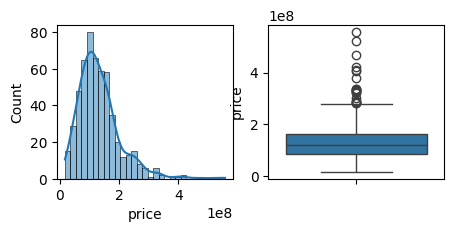

In [459]:
min_w, max_w = outliers(df.price)

In [460]:
df = df[df.price.between(min_w, max_w)]
df.head()

,price,area,bedrooms,bathrooms,hotwaterheating,parking,furnishingstatus
0,131904400,3320,4,5,yes,2,Unfurnished
1,64562420,1738,3,4,yes,1,Semi-furnished
3,147792000,3400,4,4,yes,3,Unfurnished
4,143790000,3320,4,4,yes,2,Semi-furnished
5,130420000,3400,4,5,yes,2,Semi-furnished


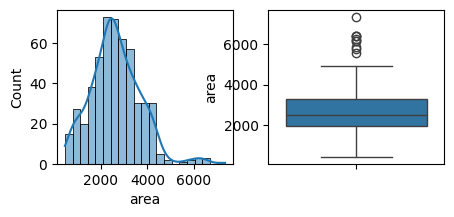

In [461]:
min_w, max_w = outliers(df.area)

In [462]:
df = df[df.area.between(min_w, max_w)]
df.head()

,price,area,bedrooms,bathrooms,hotwaterheating,parking,furnishingstatus
0,131904400,3320,4,5,yes,2,Unfurnished
1,64562420,1738,3,4,yes,1,Semi-furnished
3,147792000,3400,4,4,yes,3,Unfurnished
4,143790000,3320,4,4,yes,2,Semi-furnished
5,130420000,3400,4,5,yes,2,Semi-furnished


### Encoding Techniques

Converting categorical variables to numeric variables is called "encoding" or "categorical encoding." This process involves transforming categorical data, which represents categories or labels, into numerical values that can be used in machine learning models.

There are several methods for encoding categorical variables into numerical format, including:

- `Ordinal Encoding:` Assigns a unique integer to each category based on the order or ranking of the categories.

- `One-Hot Encoding:` Creates binary columns for each category, where each column represents whether a sample belongs to that category or not (1 or 0).

- `Label Encoding:` Encodes target labels with values between 0 and n_that category.

###### Encoding column hotwaterheating using map()

In [463]:
df.head()

,price,area,bedrooms,bathrooms,hotwaterheating,parking,furnishingstatus
0,131904400,3320,4,5,yes,2,Unfurnished
1,64562420,1738,3,4,yes,1,Semi-furnished
3,147792000,3400,4,4,yes,3,Unfurnished
4,143790000,3320,4,4,yes,2,Semi-furnished
5,130420000,3400,4,5,yes,2,Semi-furnished


In [464]:
df.hotwaterheating.unique()

array(['yes', 'no'], dtype=object)

In [465]:
df.hotwaterheating = df.hotwaterheating.map({"yes" : 1, "no" : 0})
df.head()

,price,area,bedrooms,bathrooms,hotwaterheating,parking,furnishingstatus
0,131904400,3320,4,5,1,2,Unfurnished
1,64562420,1738,3,4,1,1,Semi-furnished
3,147792000,3400,4,4,1,3,Unfurnished
4,143790000,3320,4,4,1,2,Semi-furnished
5,130420000,3400,4,5,1,2,Semi-furnished


#### OneHotEncoding

- OneHotEncoder is a preprocessing technique used in machine learning to convert categorical variables into a one-hot encoded representation.
- In many machine learning algorithms, categorical variables cannot be directly used as input, as they are non-numeric and don't have an inherent order or magnitude. One way to handle categorical variables is to convert them into a numerical representation that can be fed into machine learning models.
- The one-hot encoding technique converts categorical variables into a binary matrix, where each category is represented by a binary vector of length equal to the number of unique categories in the variable. In this binary matrix, each column represents a category, and each row corresponds to an observation.
- For each observation, the value is 1 in the column corresponding to the category of that observation, and 0 in all other columns. This ensures that the numerical representation is not biased by the original categorical values and preserves the categorical nature of the variable.

###### Ecoding furnishingstatus using OneHotEncoder

In [454]:
df.furnishingstatus.unique()

array(['Unfurnished', 'Semi-furnished', 'Furnished'], dtype=object)

In [466]:
# from sklearn.preprocessing import OneHotEncoder

# encoder = OneHotEncoder()
# encoded_data = encoder.fit_transform(df.furnishingstatus.to_frame())

# data = pd.DataFrame(encoded_data.toarray().astype(int), columns=['Furnished', 'Semi-furnished', 'Unfurnished'])

# df = pd.concat((df, data), axis=1)
# df.drop(columns="furnishingstatus", inplace=True)
# df.head()

#### pd.getdummies()

`pd.get_dummies()` performs the following steps:

- Identifies categorical variables in the input data.
- Creates binary columns for each unique category in each categorical variable.
- Assigns a value of 1 to the appropriate column for each observation based on its category, and 0 to all other columns.

This function is useful for quickly converting categorical variables into a format suitable for machine learning algorithms that require numerical input. It's commonly used during data preprocessing and feature engineering steps in data analysis and machine learning workflows.

###### Ecoding furnishingstatus using pd.getdummies()

In [467]:
df = pd.get_dummies(data=df, columns=["furnishingstatus"], dtype=int)
df.head()

,price,area,bedrooms,bathrooms,hotwaterheating,parking,furnishingstatus_Furnished,furnishingstatus_Semi-furnished,furnishingstatus_Unfurnished
0,131904400,3320,4,5,1,2,0,0,1
1,64562420,1738,3,4,1,1,0,1,0
3,147792000,3400,4,4,1,3,0,0,1
4,143790000,3320,4,4,1,2,0,1,0
5,130420000,3400,4,5,1,2,0,1,0


### Scaling of Numerical Variables

#### Standardization (Z-score normalization):

- Standardization scales the features so that they have a mean of 0 and a standard deviation of 1.
- It subtracts the mean of the feature and then divides by the standard deviation.
- This method assumes that the data follows a Gaussian distribution (normal distribution).
- Standardization is less affected by outliers compared to min-max scaling.

#### Min-Max Scaling:

- Min-Max scaling scales the features to a fixed range, typically [0, 1].
- It subtracts the minimum value of the feature and then divides by the range (maximum value minus minimum value).
- Min-Max scaling preserves the shape of the original distribution and is used when the algorithm does not assume a normal distribution of the features. However, it is sensitive to outliers.

In [469]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)
df.head()

,price,area,bedrooms,bathrooms,hotwaterheating,parking,furnishingstatus_Furnished,furnishingstatus_Semi-furnished,furnishingstatus_Unfurnished
0,0.44,0.64,1.00,1.00,1.00,0.67,0.00,0.00,1.00
1,0.18,0.29,0.67,0.75,1.00,0.33,0.00,1.00,0.00
2,0.50,0.66,1.00,0.75,1.00,1.00,0.00,0.00,1.00
3,0.48,0.64,1.00,0.75,1.00,0.67,0.00,1.00,0.00
4,0.43,0.66,1.00,1.00,1.00,0.67,0.00,1.00,0.00


In [470]:
# background process
(131904400 - df.price.min()) / (df.price.max() - df.price.min())

np.float64(131904400.0)

### Multicolinearity

- Multicollinearity exists when there is a correlation between multiple independent variables in a multiple regression model.
-  When two variables have a correlation coefficient of either +1.0 or -1.0, they are considered perfectly collinear.- 
The presence of multicollinearity among independent variables can lead to less dependable statistical conclusions.

#### Pair Plot

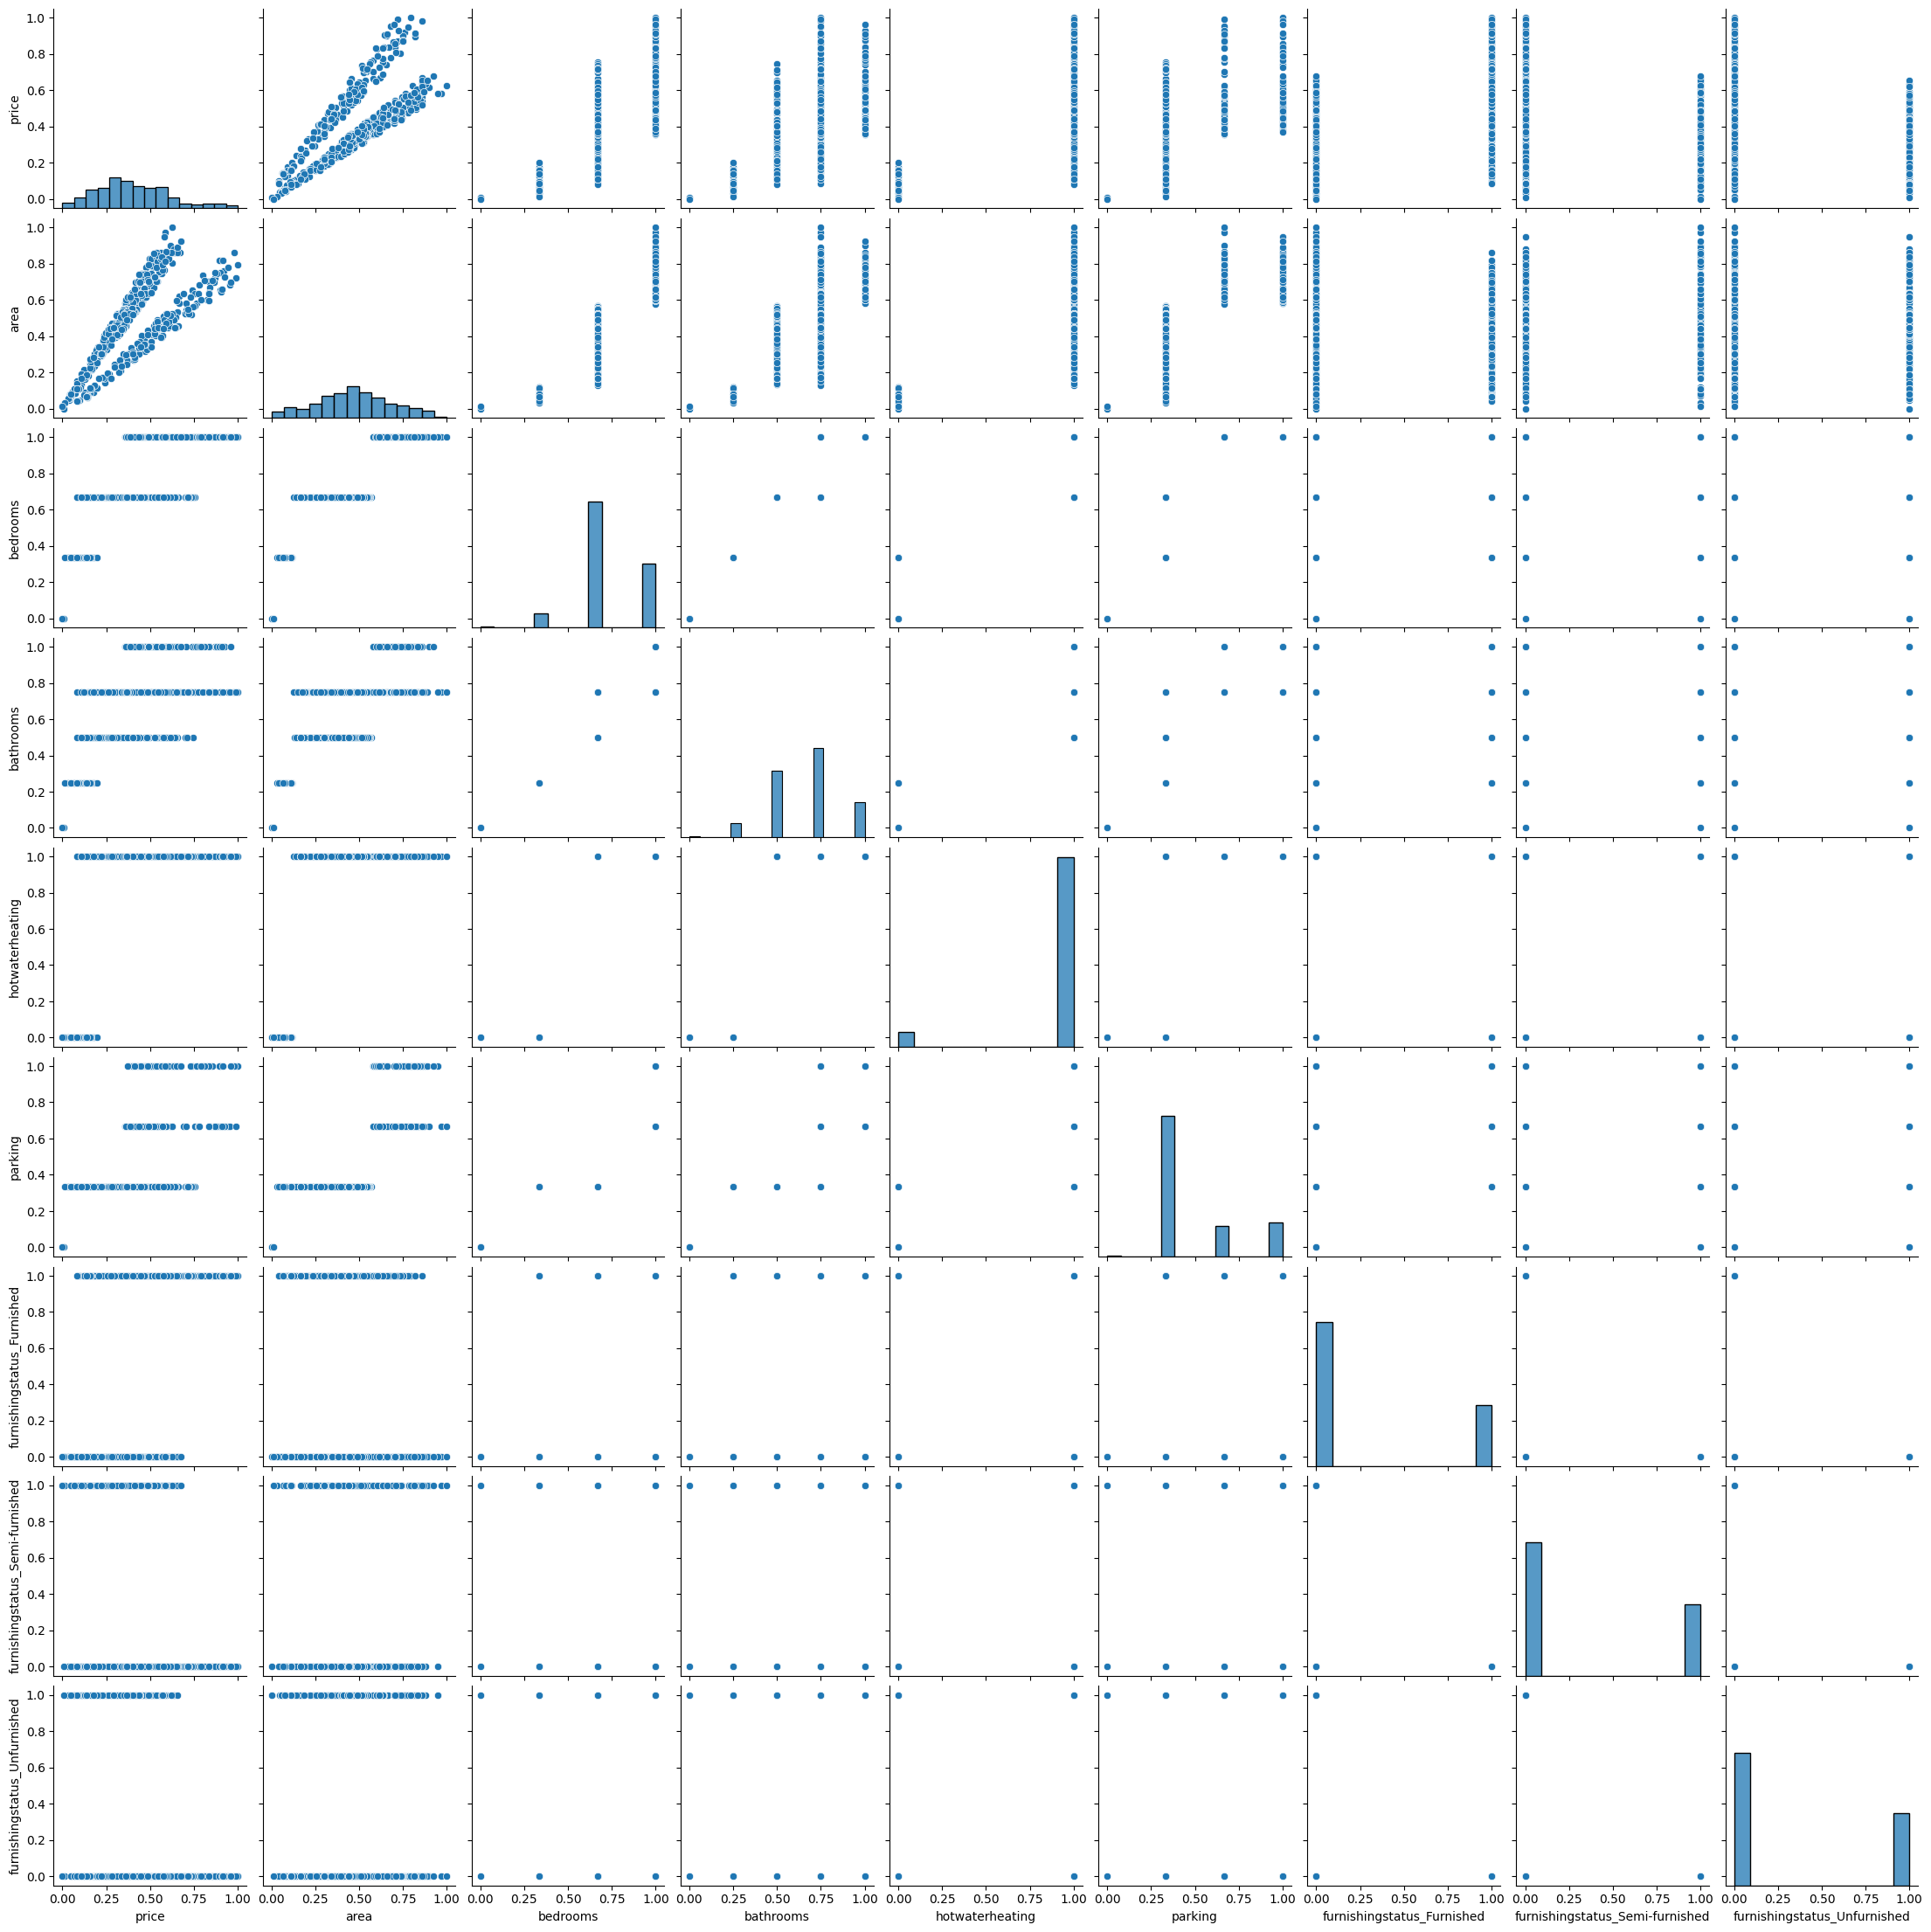

In [471]:
sns.pairplot(df)

#### Correlation matrix

In [472]:
df.corr()

,price,area,bedrooms,bathrooms,hotwaterheating,parking,furnishingstatus_Furnished,furnishingstatus_Semi-furnished,furnishingstatus_Unfurnished
price,1.00,0.77,0.69,0.53,0.43,0.58,0.50,-0.20,-0.28
area,0.77,1.00,0.87,0.69,0.52,0.75,-0.11,0.12,-0.02
bedrooms,0.69,0.87,1.00,0.82,0.62,0.83,-0.07,0.08,-0.01
bathrooms,0.53,0.69,0.82,1.00,0.58,0.64,-0.08,0.07,0.01
hotwaterheating,0.43,0.52,0.62,0.58,1.00,0.19,-0.05,0.06,-0.02
parking,0.58,0.75,0.83,0.64,0.19,1.00,-0.07,0.05,0.01
furnishingstatus_Furnished,0.50,-0.11,-0.07,-0.08,-0.05,-0.07,1.00,-0.48,-0.48
furnishingstatus_Semi-furnished,-0.20,0.12,0.08,0.07,0.06,0.05,-0.48,1.00,-0.54
furnishingstatus_Unfurnished,-0.28,-0.02,-0.01,0.01,-0.02,0.01,-0.48,-0.54,1.00


#### Heat Maps

<Axes: >

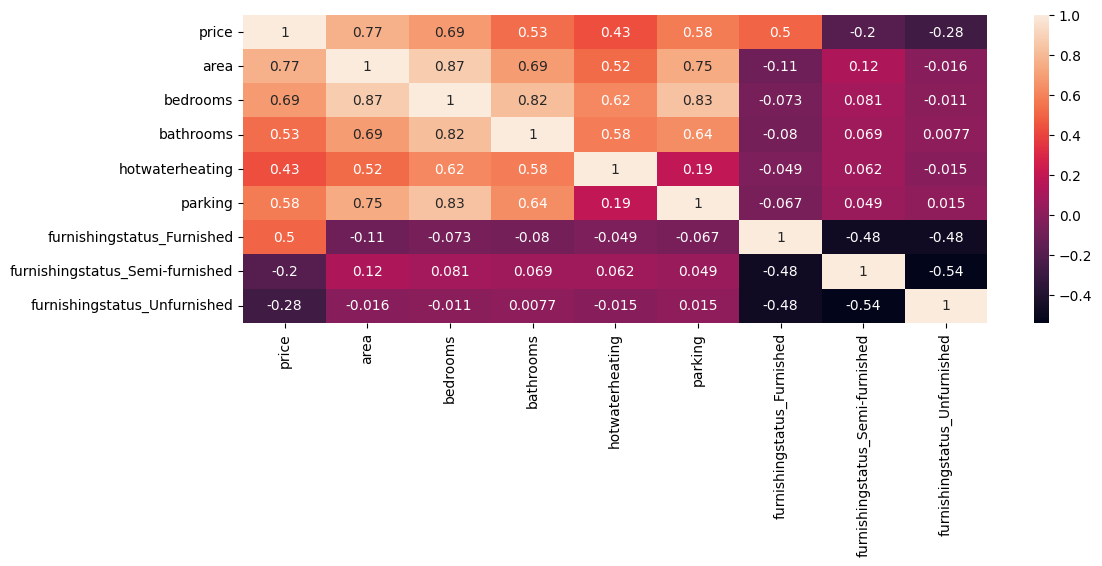

In [474]:
plt.figure(figsize = (12, 4))
sns.heatmap(df.corr(), annot=True)

#### Variance Inflation Factor (VIF) Thresholding:
- A variance inflation factor (VIF) is a measure of the amount of multicollinearity in regression analysis.
- VIF determines the strength of the correlation between the independent variables. 
- It is predicted by taking a variable and regressing it against every other variable. 
- VIF score of an independent variable represents how well the variable is explained by other independent variables.
- R^2 value is determined to find out how well an independent variable is described by the other independent variables. A high value of R^2 means that the variable is highly correlated with the other variables.
- Set a threshold for VIF values and remove predictor variables with VIF values exceeding the threshold.
    - `VIF < 5: Low multicollinearity.` The variance of the estimated regression coefficient is moderately affected by multicollinearity.
    - `5 ≤ VIF < 10: Moderate multicollinearity.` The variance of the estimated regression coefficient is significantly affected by multicollinearity.
    - `VIF ≥ 10: High multicollinearity.` The variance of the estimated regression coefficient is highly affected by multicollinearity, and the coefficient may be unreliable.

In [477]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
features = df.drop(columns=["price", "furnishingstatus_Semi-furnished", "bedrooms"])
features = api.add_constant(features)

vif_result = pd.DataFrame()
vif_result["Variable"] = features.columns
vif_result["VIF value"] = [variance_inflation_factor(features.values, i) for i in range(features.shape[1])] 
vif_result

,Variable,VIF value
0,const,19.34
1,area,3.48
2,bathrooms,2.70
3,hotwaterheating,2.05
4,parking,3.16
5,furnishingstatus_Furnished,1.33
6,furnishingstatus_Unfurnished,1.31


### Building and Evaluating Linear Regression Model

- We have labelled data thus using supervised ML 
- Labeled data is continious thus using Regression Algorithm
- There is linear correlation between features and label and thus using Linear Regression

In [478]:
features = df.drop(columns=["price", "furnishingstatus_Semi-furnished", "bedrooms"])
label = df.price.to_frame()

#### 1. Split data into test and train

In [479]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(features, label, test_size=0.3, random_state=42)

#### 2. Fit Linear Regression Model

In [480]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

#### 3. Predict y values using test data

In [481]:
y_pred = model.predict(X_test)

#### 4. Model Evaluaion

Evaluating a linear regression model involves assessing how well it performs in predicting the target variable based on the input features. Here are some commonly used evaluation metrics for linear regression:

 **1. Mean Absolute Error (MAE):**
    MAE measures the average absolute difference between the observed values and the predicted values. It is less sensitive to outliers compared to MSE.

 **2. Mean Squared Error (MSE):**
    MSE measures the average squared difference between the observed values and the predicted values. It gives higher weight to large errors.

 **3. Root Mean Squared Error (RMSE):**
	RMSE is the square root of the MSE. It provides an interpretable measure of the average magnitude of the errors in the same units as the target variable.
	
 **4. R-squared (R2) Score:**
	R2 score measures the proportion of the variance in the dependent variable that is predictable from the independent variables. It ranges from 0 to 1, with higher values indicating a better fit.

In [483]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, root_mean_squared_error, r2_score

print("MAE - ", mean_absolute_error(y_test, y_pred))
print("MSE - ", mean_squared_error(y_test, y_pred))
print("RMSE - ", root_mean_squared_error(y_test, y_pred))
print("R-sqaured - ", r2_score(y_test, y_pred))

MAE -  0.04110642574763813
MSE -  0.0028765462936804222
RMSE -  0.053633443798440004
R-sqaured -  0.9316395818633878


#### Residual Analysis

- Residual analysis is a statistical technique used to assess the quality of a regression model by examining the differences between the observed values of the dependent variable and the values predicted by the model (i.e., the residuals).
- Residuals are the vertical distances between the observed data points and the regression line or surface.



<Axes: ylabel='Count'>

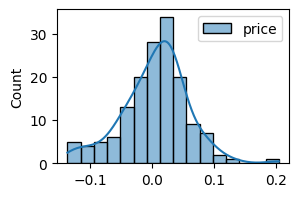

In [485]:
residuals = y_test - y_pred
sns.histplot(residuals, kde = True)
# plt.axvline(residuals.mean(), color = "red")

<hr><hr>

## Logistic Regression

- Logistic Regression is a statistical method used for modeling the probability of a binary outcome or a categorical outcome with more than two categories.
- In logistic regression, the dependent variable (or target variable) is binary, meaning it can take only two possible outcomes, typically coded as 0 and 1 (e.g., "yes" or "no", "success" or "failure", "positive" or "negative").
- The goal of logistic regression is to model the probability that the dependent variable belongs to a particular category as a function of one or more independent variables (or features).

#### Assumptions

- Binary Dependent Variable: Logistic regression assumes that the dependent variable (or target variable) is binary, meaning it has only two possible outcomes (e.g., 0 or 1, "yes" or "no").

- Independence of Observations: Logistic regression assumes that the observations (data points) are independent of each other. In other words, the probability of one observation belonging to a particular category does not depend on the outcomes of other observations.

- Linearity of Independent Variables and Log-Odds: Logistic regression assumes that the relationship between the independent variables and the log-odds of the dependent variable is linear. This means that the log-odds of the dependent variable are a linear combination of the independent variables after applying the logistic transformation.

- No Multicollinearity: Logistic regression assumes that there is little or no multicollinearity among the independent variables. Multicollinearity occurs when two or more independent variables are highly correlated with each other, which can make it difficult to estimate the coefficients accurately.

- Absence of Outliers: Logistic regression is sensitive to outliers, which are data points that significantly deviate from the overall pattern of the data. Outliers can influence the estimated coefficients and affect the model's predictions.


### Data Preparation

#### Reading data from file

In [ ]:
df = pd.read_csv("Credit Default.csv")
df.head()

#### Handling Nulls

#### Handlilng Outliers

#### Encoding

#### Checking for Linearity and Multicolinearity

In [ ]:
df.corr(method="spearman")

In [ ]:
sns.heatmap(df.corr(method="spearman"), annot=True, cmap="RdYlGn")

#### Scaling

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)
df.head()

### Data Modelling

#### Select Features and Label

#### Split data into Train and Test

#### Build Logistic Regression Model

#### Predict Values

#### Model Evaluation

#### Accuracy: 
The proportion of correctly predicted instances (both positive and negative) out of the total number of instances

#### Confusion Matrix: 
A table showing the counts of true positives (TP), true negatives (TN), false positives (FP), and false negatives (FN). From the confusion matrix, other evaluation metrics can be calculated.

- Interpreting confusion matrix
  
    - True Positive (TP): The number of instances that were correctly predicted as positive (or belonging to the positive class) by the model.

    - True Negative (TN): The number of instances that were correctly predicted as negative (or belonging to the negative class) by the model.

    - False Positive (FP): The number of instances that were incorrectly predicted as positive (predicted positive, but actually negative) by the model. Also known as Type I error.

    - False Negative (FN): The number of instances that were incorrectly predicted as negative (predicted negative, but actually positive) by the model. Also known as Type II error.

<hr><hr>

#### Common Date and Time Formats

**Year-Month-Day**

- '%Y-%m-%d' — e.g., 2024-09-06
- %Y: Year with century (e.g., 2024)
- %m: Month as a zero-padded decimal number (e.g., 09)
- %d: Day of the month as a zero-padded decimal number (e.g., 06)

**Month-Day-Year**

- '%m-%d-%Y' — e.g., 09-06-2024
- %m: Month as a zero-padded decimal number (e.g., 09)
- %d: Day of the month as a zero-padded decimal number (e.g., 06)
- %Y: Year with century (e.g., 2024)

**Day-Month-Year**

- '%d-%m-%Y' — e.g., 06-09-2024
- %d: Day of the month as a zero-padded decimal number (e.g., 06)
- %m: Month as a zero-padded decimal number (e.g., 09)
- %Y: Year with century (e.g., 2024)
- Year-Month-Day Hour:Minute

**'%Y-%m-%d %H:%M:%S' — e.g., 2024-09-06 14:30:00**
- %Y: Year with century (e.g., 2024)
- %m: Month as a zero-padded decimal number (e.g., 09)
- %d: Day of the month as a zero-padded decimal number (e.g., 06)
- %H: Hour (24-hour clock) as a zero-padded decimal number (e.g., 14)
- %M: Minute as a zero-padded decimal number (e.g., 30)
- %S: Second as a zero-padded decimal number (e.g., 00)


**Month Day, Year Hour:Minute**

- '%B %d, %Y %H:%M:%S' — e.g., September 06, 2024 14:30:00
- %B: Full month name (e.g., September)
- %d: Day of the month as a zero-padded decimal number (e.g., 06)
- %Y: Year with century (e.g., 2024)
- %H: Hour (24-hour clock) as a zero-padded decimal number (e.g., 14)
- %M: Minute as a zero-padded decimal number (e.g., 30)
- %S: Second as a zero-padded decimal number (e.g., 00)

**Day Month Year**

- '%d %b %Y' — e.g., 06 Sep 2024
- %d: Day of the month as a zero-padded decimal number (e.g., 06)
- %b: Abbreviated month name (e.g., Sep)
- %Y: Year with century (e.g., 2024)

#### ISO 8601 Format

- '%Y-%m-%dT%H:%M:%S' — e.g., 2024-09-06T14:30:00
- %Y: Year with century (e.g., 2024)
- %m: Month as a zero-padded decimal number (e.g., 09)
- %d: Day of the month as a zero-padded decimal number (e.g., 06)
- %H: Hour (24-hour clock) as a zero-padded decimal number (e.g., 14)
- %M: Minute as a zero-padded decimal number (e.g., 30)
- %S: Second as a zero-padded decimal number (e.g., 00)

**Year-Month-Day Hour**

- '%Y-%m-%d %H:%M' — e.g., 2024-09-06 14:30
- %Y: Year with century (e.g., 2024)
- %m: Month as a zero-padded decimal number (e.g., 09)
- %d: Day of the month as a zero-padded decimal number (e.g., 06)
- %H: Hour (24-hour clock) as a zero-padded decimal number (e.g., 14)
- %M: Minute as a zero-padded decimal number (e.g., 30)

In [ ]:
df = pd.read_csv("SeaPlaneTravel.csv")
df['Month'] = pd.to_datetime(df['Month'], format='%Y-%m')
df

In [ ]:
# Plot the data to inspect trends
sns.lineplot(df, x="Month", y = "#Passengers")

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Perform seasonal decomposition
decomposition = seasonal_decompose(df['#Passengers'], model='additive', period=30)

# Plot the decomposition
plt.figure(figsize=(14, 10))

plt.subplot(4, 1, 1)
plt.plot(df["Month"], df['#Passengers'], label='Original')
plt.legend(loc='best')
plt.title('Original Time Series')
plt.gca().xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter('%Y-%m'))
plt.gca().xaxis.set_major_locator(plt.matplotlib.dates.MonthLocator(interval = 5))
plt.xticks(rotation=45) 

plt.subplot(4, 1, 2)
plt.plot(df["Month"], decomposition.trend, label='Trend')
plt.legend(loc='best')
plt.title('Trend Component')
plt.gca().xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter('%Y-%m'))
plt.gca().xaxis.set_major_locator(plt.matplotlib.dates.MonthLocator(interval = 5))
plt.xticks(rotation=45) 

plt.subplot(4, 1, 3)
plt.plot(df["Month"],decomposition.seasonal, label='Seasonal')
plt.legend(loc='best')
plt.title('Seasonal Component')

plt.subplot(4, 1, 4)
plt.plot(df["Month"], decomposition.resid, label='Residual')
plt.legend(loc='best')
plt.title('Residual Component')

plt.tight_layout()
plt.show()


In [ ]:
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

# Step 2: Preprocess Data
# Check for stationarity (use differencing if needed)
df_diff = df['#Passengers'].diff().dropna().to_frame()

# Step 3: Split Data into Training and Testing
train_size = int(len(df) * 0.8)
train, test = df['#Passengers'][:train_size], df['#Passengers'][train_size:]


# Step 4: Build the ARIMA Model
model = ARIMA(train, order=(5, 1, 2))  # The (p, d, q) parameters can be tuned
model_fit = model.fit()

# Step 5: Make Predictions
predictions = model_fit.forecast(steps=len(test))

# Step 6: Evaluate the Model
rmse = np.sqrt(mean_squared_error(test, predictions))
print(f"Test RMSE: {rmse}")

# Plot Actual vs Predicted
plt.plot(test.index, test, label='Actual')
plt.plot(test.index, predictions, label='Forecast', color='red')
plt.title('ARIMA Model - Forecast vs Actual')
plt.legend()
plt.show()

In [ ]:
normal_values = np.random.normal(loc=3, scale=1, size=99)
normal_values = np.clip(normal_values, 1, 5)
df = pd.DataFrame({"cust" : np.arange(1, 100), "hrs" : normal_values })